(6497, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
quality
6    2836
5    2138
7    1079
4     216

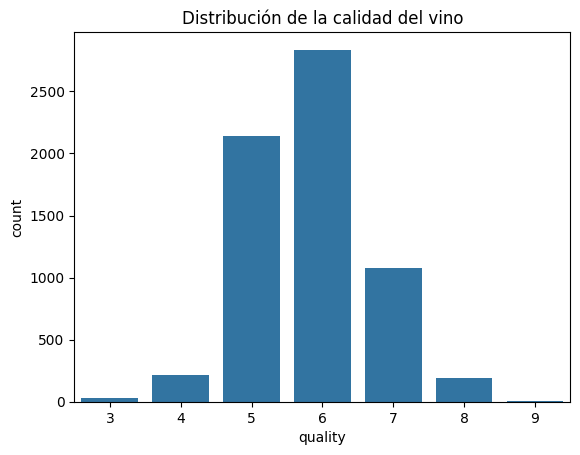

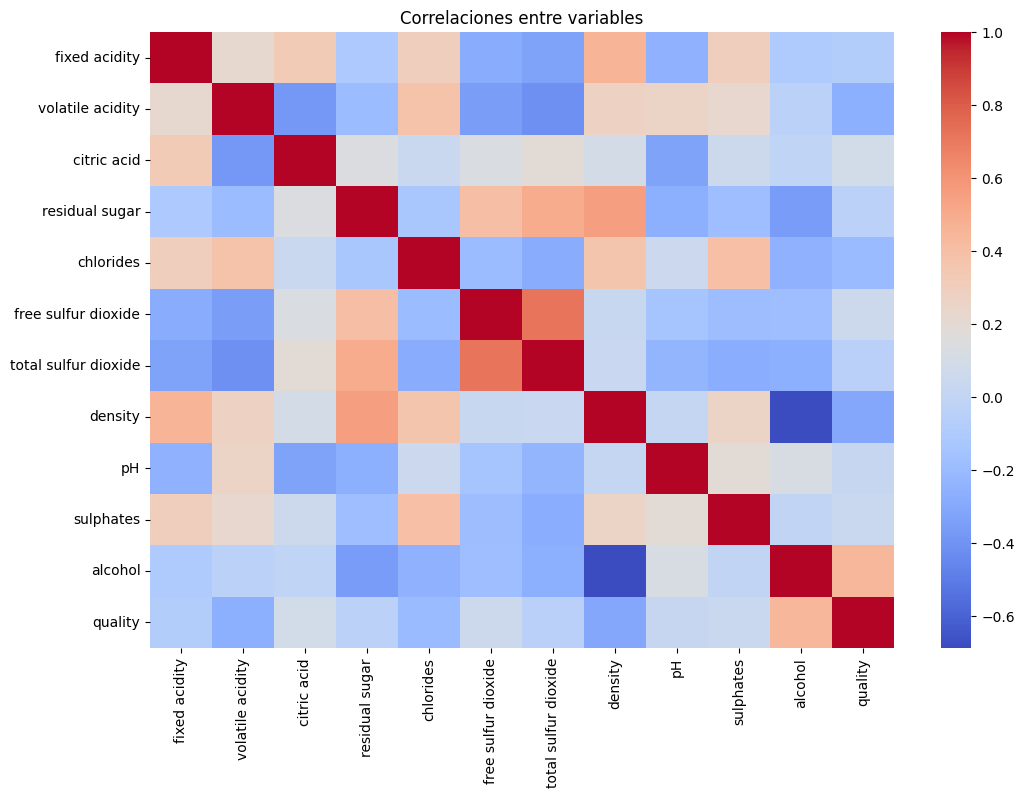

📊 Linear Regression: MSE=0.547, MAE=0.566, R2=0.260
📊 Ridge: MSE=0.547, MAE=0.566, R2=0.260
📊 Lasso: MSE=0.546, MAE=0.566, R2=0.261
🔎 Reporte de clasificación (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1048
           1       0.61      0.27      0.37       252

    accuracy                           0.82      1300
   macro avg       0.73      0.61      0.64      1300
weighted avg       0.80      0.82      0.80      1300



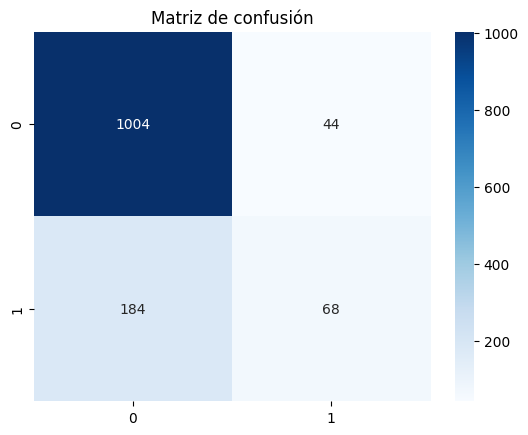

🍷 Red Wine -> R2=0.403
🍷 White Wine -> R2=0.265


In [ ]:
# 📓 Análisis de Wine Quality Dataset

# =========================
# Paso 1: Importar librerías
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from sklearn.preprocessing import StandardScaler

# =========================
# Paso 2: Cargar datos
# =========================
red = pd.read_csv("/content/sample_data/winequality-red.csv", sep=";")
white = pd.read_csv("/content/sample_data/winequality-white.csv", sep=";")

red["type"] = "red"
white["type"] = "white"

df = pd.concat([red, white], axis=0).reset_index(drop=True)

print(df.shape)
print(df.info())
print(df["quality"].value_counts())

# =========================
# Paso 3: Exploración inicial
# =========================
# Distribución de la variable objetivo
sns.countplot(x="quality", data=df)
plt.title("Distribución de la calidad del vino")
plt.show()

# Matriz de correlación
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['type']).corr(), cmap="coolwarm", annot=False)
plt.title("Correlaciones entre variables")
plt.show()

# =========================
# Paso 4: Preprocesamiento
# =========================
X = df.drop(columns=["quality", "type"])
y = df["quality"]

# Escalar variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# =========================
# Paso 5: Modelos de regresión
# =========================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"📊 {name}: MSE={mse:.3f}, MAE={mae:.3f}, R2={r2:.3f}")

# =========================
# Paso 6: Clasificación binaria
# =========================
# Definir calidad "alta" (>=7) y "baja" (<7)
df["quality_bin"] = (df["quality"] >= 7).astype(int)

X = df.drop(columns=["quality", "type", "quality_bin"])
y = df["quality_bin"]

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("🔎 Reporte de clasificación (Logistic Regression):")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.show()

# =========================
# Paso 7: Comparación Red vs White
# =========================
for wine_type in ["red", "white"]:
    subset = df[df["type"] == wine_type]
    X = subset.drop(columns=["quality", "type", "quality_bin"])
    y = subset["quality"]
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"🍷 {wine_type.capitalize()} Wine -> R2={r2_score(y_test, y_pred):.3f}")